# RFM Analysis-Customer Segmentation

#### **What is RFM?**

* It is a score that consisting of the initials of the words * Recency, Frequency, Monetary * and combining these three metrics after the calculation. It helps to analyze the current situation of customers and to segment them according to these scores.

* **Recency:** gives information such as how long the customers have received service from the website / store and how long they have been a member. Its calculation is usually obtained by subtracting the membership deadline / last order date from today.

* **Frequency:** is the metric showing how often the customer shopped and logged into the site. Usually it results in counting the order number / order code

* **Monetary:** is the sum of the customer's expenses. The turnover it brings to the e-commerce site can also be defined as the revenue collected after the services it receives. Whatever the definition of turnover is, it is calculated by adding up the life-long expenses made on the basis of the customer.

#### In this study, RFM analysis will be done by calculation of RFM metrics on Online Retail data set and I will try to divide the Customers into Segments.


#### **The online retail** data set contains sales datas. Each observation contains information on a product basis. In other words, an observatiion contains the invoice numbers and dates that express which person and the person's purchase of a product 

* **Invoice:** Refers to the number of the invoice containing the sold product.
* **StockCode:** Refers to the number of each product.
* **Description:** Description of Products
* **Quantity:** Refers to how much the relevant product has been received.
* **InvoiceDate:** Refers when it was received, the invoice date
* **UnitPrice:** Refers to the price of related product was purchased.
* **CustomerID:** Identity number(ID) of the customer who bought the relevant product.
* **Country:** Country of the customer who bought the relevant product

## Import Liblrary and Data Set

In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython.display as display
from PIL import Image

import time
from datetime import date
import datetime
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

# İgnore the Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading data Set
df_ = pd.read_excel("online_retail_II.xlsx",
                    sheet_name="Year 2009-2010")

df = df_.copy()

In [6]:
df = df_.copy()

In [7]:
# I arrange dataset to  prapare evaluation

# The ones with C at the beginning of the invoice represent the return. These need to be thrown away
df=df[~df["Invoice"].str.contains("C",na=False)] # Invooicenin  başında C olanlar geri iadeyi ifaade ediyor dolayısı ile bunları veriden atarak anali devam edeceğim

#0 is an outlier situation at Quntity. These should be discarded and observations without Customer IDs should also be discarded.
df=df[df["Quantity"]>0]
df.dropna(subset=["Customer ID"],inplace=True)



In [8]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df.shape

(407695, 8)

### Examining the data

In [11]:
# number of unique product
df["StockCode"].nunique()

4017

In [12]:
# how many unit were sold for each product
df["StockCode"].value_counts().sort_values(ascending=False)

85123A    3153
85099B    1742
22423     1706
21212     1586
21232     1407
          ... 
20791        1
90071        1
90077        1
72751C       1
35822P       1
Name: StockCode, Length: 4017, dtype: int64

In [711]:
# numbor of unique customer
df["Customer ID"].nunique()

4314

#### Review by Customers

In [738]:
# The number of purchases made by customers, the number of product types purchased and the total number of units of  products
df.groupby(["Customer ID"]).agg({"Invoice":"nunique","StockCode":"nunique","Quantity":"sum"}).sort_values("Invoice",ascending=False)

,Invoice,StockCode,Quantity
Customer ID,,,
14911.0,205,1741,69722
17850.0,155,100,21052
12748.0,144,1343,13362
15311.0,121,594,32816
13089.0,109,474,29164
...,...,...,...
13500.0,1,20,229
16100.0,1,37,438
16095.0,1,30,265


In [722]:
# total number of purschases
df["Invoice"].nunique()

19215

In [723]:
# The number of units of pproducts that was sold
df.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False)

StockCode
21212      57570
85123A     56915
84077      54754
85099B     48802
17003      48166
           ...  
21772          1
21767          1
84814A         1
84845A         1
TEST002        1
Name: Quantity, Length: 4017, dtype: int64

In [14]:
# Calculating the total return per product and posting it in df
df["TotalPrice"] = df["Quantity"]*df["Price"]

In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


#### Review by Country

In [16]:
# Number of purchases made from countries, the number of products bought, and the average and totalincome
country_df =df.groupby(["Country"]).agg({"Customer ID":"nunique","Invoice":"nunique","StockCode":"nunique","TotalPrice":["count","sum","mean"]}).sort_values(("TotalPrice","sum"),ascending=False).reset_index().droplevel(level=1,axis =1)
country_df.columns = ['Country',"num_customer", 'num_Invoice', 'num_Product','tot_quantity', 'TotalPrice', 'Average_Price']
country_df.head()

,Country,num_customer,num_Invoice,num_Product,tot_quantity,TotalPrice,Average_Price
0,United Kingdom,3971,17614,4001,370951,7.414756e+06,19.988505
1,EIRE,5,316,1999,8507,3.560852e+05,41.857906
2,Netherlands,22,135,879,2730,2.687860e+05,98.456410
3,Germany,67,347,1457,7661,2.023953e+05,26.418917
4,France,47,236,1275,5470,1.462154e+05,26.730424


In [24]:
sns.countplot(x=df["Country"],y=df["StockCode"], label="Gold")

ValueError: Cannot pass values for both `x` and `y`

'ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"],\nlabel="Silver")'

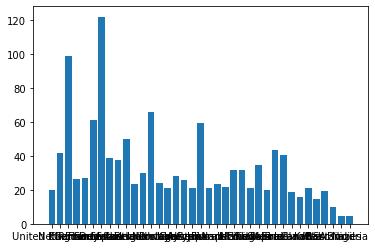

In [26]:
fig, ax = plt.subplots()
ax.bar(country_df["Country"], country_df["Average_Price"], label="Gold")
"""ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"],
label="Silver")"""

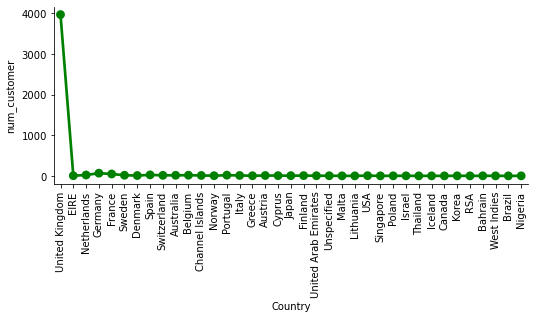

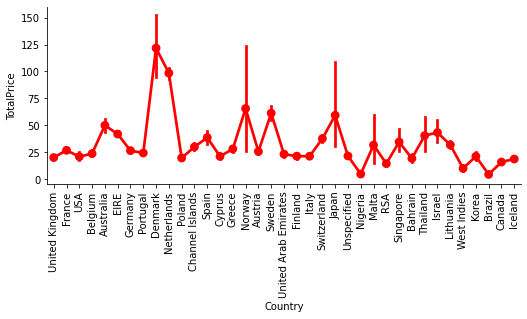

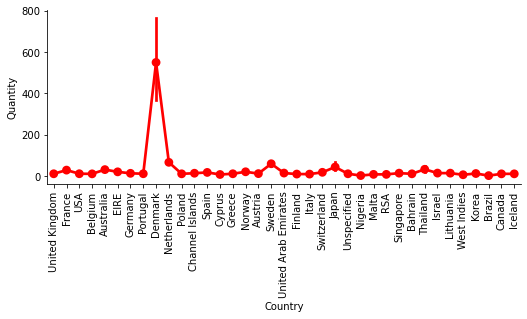

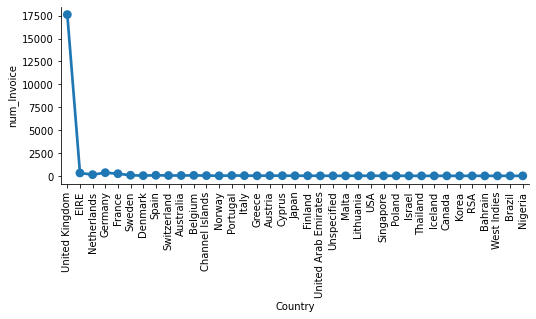

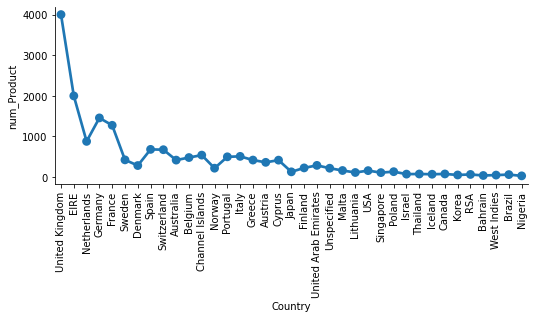

In [759]:
# Some visualization by Country

# Total Customer 
sns.catplot(x="Country", y="num_customer",data=country_df,kind="point",color="g",height=3, aspect=2.5)
plt.xticks(rotation=90);
plt.show()
# Average Price
sns.catplot(x="Country", y="TotalPrice", data=df,kind="point",color="r",height=3, aspect=2.5)
plt.xticks(rotation=90);
plt.show()

# Average Quantity
sns.catplot(x="Country", y="Quantity", data=df,kind="point",color="r",height=3, aspect=2.5)
plt.xticks(rotation=90);            
plt.show()

# Number of Purchases
sns.catplot(x="Country", y="num_Invoice",data=country_df,kind="point",height=3, aspect=2.5)
plt.xticks(rotation=90);
plt.show()

# number of product variety
sns.catplot(x="Country", y="num_Product",data=country_df,kind="point",height=3, aspect=2.5)
plt.xticks(rotation=90);
plt.show()

### Verinin Tarihe göre incelenmesi

In [35]:
# I converted clocked dates into a diary
df["InvoiceDate_DAY"]=df["InvoiceDate"].apply(lambda x: datetime.date(x.year,x.month,x.day))
df["InvoiceDate_DAY"]= pd.to_datetime(df["InvoiceDate_DAY"])
# Catch monthly periods
df["InvoiceDate_Month"]=df["InvoiceDate"].dt.to_period('M')
#date_mont_df["InvoiceDate_Month"]=date_mont_df["InvoiceDate_Month"].astype("str")

In [36]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceDate_DAY,InvoiceDate_Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12


In [38]:
# How many days of data are there
df["InvoiceDate_DAY"].nunique()

307

<BarContainer object of 307 artists>

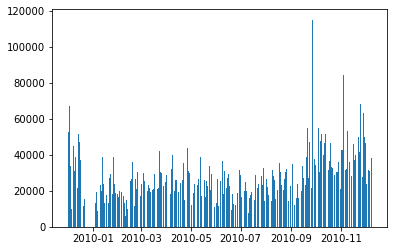

In [33]:
fig, ax = plt.subplots()
ax.bar(date_df["InvoiceDate_DAY"], date_df["TotalPrice"], label="Gold")

In [29]:
# convert the data as daily
date_df=df.groupby("InvoiceDate_DAY").agg({"Invoice":"nunique","StockCode":"nunique" ,"Quantity":"sum","TotalPrice":"sum"}).reset_index()
date_df

,InvoiceDate_DAY,Invoice,StockCode,Quantity,TotalPrice
0,2009-12-01,98,1042,24437,44048.69
1,2009-12-02,110,1087,29783,52941.99
2,2009-12-03,122,1082,48033,67479.08
3,2009-12-04,80,1006,20069,34064.41
4,2009-12-05,30,285,5119,9803.05
...,...,...,...,...,...
302,2010-12-05,87,1142,16450,31771.60
303,2010-12-06,94,916,16291,31215.64
304,2010-12-07,71,630,19444,53795.31
305,2010-12-08,111,932,21573,39248.82


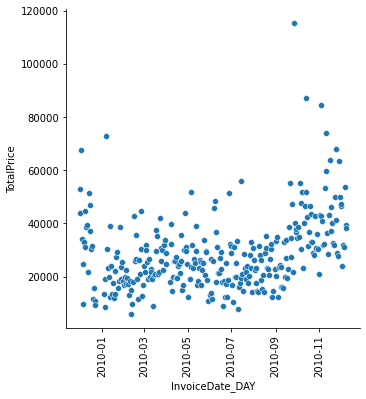

In [605]:
sns.relplot(x="InvoiceDate_DAY", y= "TotalPrice", data = date_df)
plt.xticks(rotation=90);                
plt.show()

In [41]:
#convert the data to monthly periods
date_month_df=df.groupby("InvoiceDate_Month").agg({"Invoice":"nunique","StockCode":"nunique" ,"Quantity":"sum","TotalPrice":"sum"}).reset_index()
date_month_df

,InvoiceDate_Month,Invoice,StockCode,Quantity,TotalPrice
0,2009-12,1512,2725,400201,686654.160
1,2010-01,1011,2368,370967,557319.062
2,2010-02,1106,2375,372771,506371.066
3,2010-03,1524,2668,503467,699608.991
4,2010-04,1329,2340,352042,594609.192
5,2010-05,1377,2377,386297,599985.790
6,2010-06,1497,2494,391682,639066.580
7,2010-07,1381,2391,325661,591636.740
8,2010-08,1293,2474,453590,604242.650
9,2010-09,1689,2526,569265,831615.001


TypeError: _set_ticklabels() missing 1 required positional argument: 'labels'

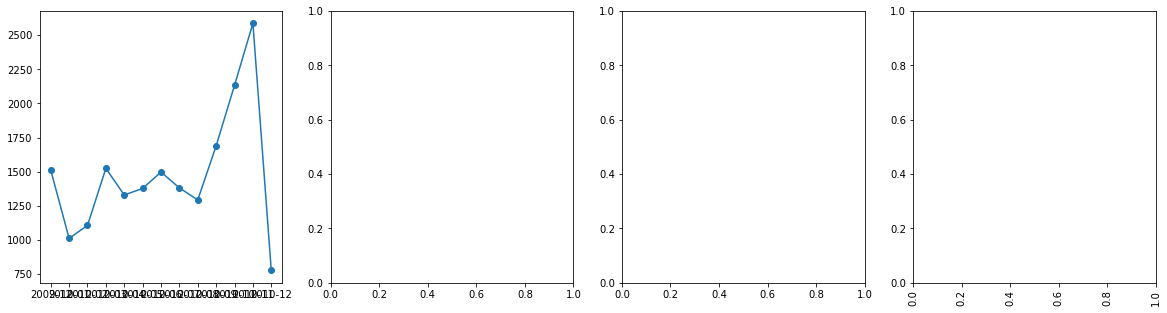

In [62]:
# Monthly Total Revenue
fig,ax=plt.subplots(1,4,figsize=(20,5))
plt.xticks(rotation=90);

ax[0].plot(date_month_df["InvoiceDate_Month"].astype("str"), date_month_df["Invoice"], marker="o",)
ax[0].set_xticklabels(rotation=90)
ax[1].plot(date_month_df["InvoiceDate_Month"].astype("str"), date_month_df["StockCode"], marker="o",)
plt.xticks(rotation=90);
ax[2].plot(date_month_df["InvoiceDate_Month"].astype("str"), date_month_df["Quantity"], marker="o",)
ax[3].plot(date_month_df["InvoiceDate_Month"].astype("str"), date_month_df["TotalPrice"], marker="o",)

plt.xticks(rotation=90);

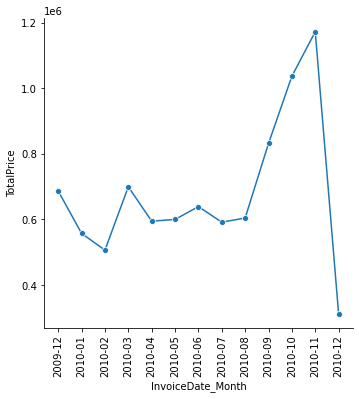

In [43]:
# Aylık Toplam Ciro
sns.relplot(x=date_mont_df["InvoiceDate_Month"].astype("str"), y= "TotalPrice", data = date_mont_df,kind="line", marker="o",)
plt.xticks(rotation=90);

## Calculation of RFM Metrics

* **Those with an RFM score of 555 are the best score, and those with 111 the worst score. Each number here comes from the Recency, Frequency, and Monetary metrics. Each Metric is scored between 1-5.**
* **The ones with high recancy score are given a low score of 1, and those with low score a high score of 5**
* **Those with high Monetary and Frequancy scores are given a high score of 5, and a low score is 1**

* **The overall RFM score is obtained by putting the scores from all 3 metrics side by side.**

* **Therefore, when these scores are combined, triple combinations of the numbers between 1 and 5 are obtained and general score representations between 111 and 555 are formed**

#### Creat RFM Dataframe

In [220]:
# I created empity dataframe
rfm = pd.DataFrame()
# I kept 2 days after the last purchase called today date
today_date =df["InvoiceDate"].max()+timedelta(days=2) # 
# I created RFM dataframe
rfm[["Recency", "Frequency", "Monetary"]]=df.groupby("Customer ID").agg({
                                                "InvoiceDate": lambda date: (today_date-date.max()).days,
                                                 "Invoice": lambda num:len(num),
                                                  "TotalPrice": lambda price: sum(price)})

In [221]:
# No observations with a monetary value or a Frequency value of 0. For this reason, I subtract 0 ones
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [222]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,166,33,372.86
12347.0,4,71,1323.32
12348.0,75,20,222.16
12349.0,44,102,2671.14
12351.0,12,21,300.93


#### Hesaplanan RFM Metriklerini Skorlayalım

In [223]:
# Recency Scor: Highest scor to lowest
rfm["RecencyScore"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])

In [224]:
# Frequency Scor: Highest scor to highest
rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])

In [225]:
# Monetary Scor: Highest scor to highest
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"],5, labels=[1,2,3,4,5])

In [226]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.0,166,33,372.86,2,3,2
12347.0,4,71,1323.32,5,4,4
12348.0,75,20,222.16,2,2,1
12349.0,44,102,2671.14,3,4,5
12351.0,12,21,300.93,5,2,2


In [227]:
# Combining RFM Scores to obtain Score display

rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [228]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.0,166,33,372.86,2,3,2,232
12347.0,4,71,1323.32,5,4,4,544
12348.0,75,20,222.16,2,2,1,221
12349.0,44,102,2671.14,3,4,5,345
12351.0,12,21,300.93,5,2,2,522


In [242]:
# Customers that has 5 5 5 scores in terms of 3 metrics
rfm[rfm["RFM_SCORE"] =="555"].head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
50,12415.0,12,212,19543.84,5,5,5,555,Champions
63,12431.0,10,170,4370.52,5,5,5,555,Champions
64,12433.0,3,286,7205.39,5,5,5,555,Champions
87,12471.0,11,678,20139.74,5,5,5,555,Champions
88,12472.0,6,572,11308.48,5,5,5,555,Champions


In [243]:
# Customers that has15 1 1 scores in terms of 3 metrics
rfm[rfm["RFM_SCORE"] =="111"].head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
14,12362.0,375,1,130.00,1,1,1,111,Hibernating
33,12392.0,228,7,234.75,1,1,1,111,Hibernating
41,12404.0,319,1,63.24,1,1,1,111,Hibernating
51,12416.0,293,11,202.56,1,1,1,111,Hibernating
82,12466.0,319,1,56.73,1,1,1,111,Hibernating


#### Name the  Calculated RFM Scores

* **Segmentation is made using the RFM table created in two dimensions according to the Recency and Frequency scores from the RFM metrics**
* **Therefore, according to this tagblo, I have to assign segment groups to rfm dataframe according to their recency and frequency scores**

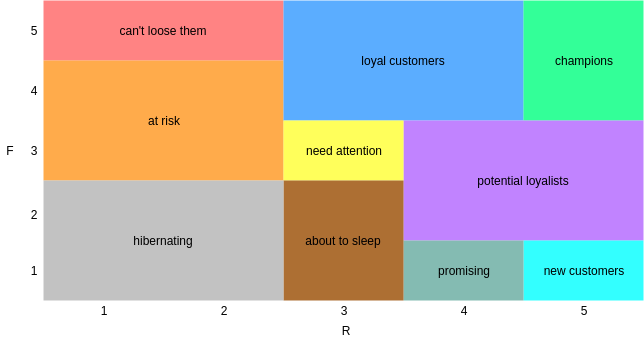

In [742]:
# Read Images 
image_path = 'RFM Analizi Tablosu.png'
display.display(Image.open(image_path))

In [230]:
#Name RFM
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}


In [231]:
# I assign these names to the rfm segment according to their recency and frequency scores.
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)

rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

rfm.reset_index(inplace=True)

In [232]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,166,33,372.86,2,3,2,232,At_Risk
12347.0,4,71,1323.32,5,4,4,544,Champions
12348.0,75,20,222.16,2,2,1,221,Hibernating
12349.0,44,102,2671.14,3,4,5,345,Loyal_Customers
12351.0,12,21,300.93,5,2,2,522,Potential_Loyalists


#### Let's review the last RFM DataFrame

In [379]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.0,166,33,372.86,2,3,2,232,At_Risk
1,12347.0,4,71,1323.32,5,4,4,544,Champions
2,12348.0,75,20,222.16,2,2,1,221,Hibernating
3,12349.0,44,102,2671.14,3,4,5,345,Loyal_Customers
4,12351.0,12,21,300.93,5,2,2,522,Potential_Loyalists


In [449]:
 rfm.groupby("Segment").agg({"MonetaryScore":"mean","FrequencyScore":"median","RecencyScore":"mean","Customer ID":"count","Recency":"mean","Frequency":"mean", "Monetary":"mean"}).reset_index()


,Segment,MonetaryScore,FrequencyScore,RecencyScore,Customer ID,Recency,Frequency,Monetary
0,About_to_Sleep,1.953488,2,3.000000,344,54.543605,16.107558,447.839826
1,At_Risk,3.053726,3,1.611785,577,166.053726,59.564991,1180.625170
2,Cant_Loose,4.343434,5,1.777778,99,129.868687,220.646465,3002.426980
3,Champions,4.414557,5,5.000000,632,8.039557,273.354430,6964.077188
4,Hibernating,1.772152,1,1.407011,1027,207.059396,14.516066,461.186768
5,Loyal_Customers,4.135834,4,3.560155,773,38.401035,168.276843,2662.046864
6,Need_Attention,3.078313,3,3.000000,166,54.680723,45.271084,935.626627
7,New_Customers,1.954545,1,5.000000,66,8.757576,7.818182,482.087121
8,Potential_Loyalists,2.765504,3,4.403101,516,19.439922,37.203488,1024.276880
9,Promising,1.767857,1,4.000000,112,25.991071,8.616071,456.508214


In [761]:
# I created RFM Segment Table
rfm["RecencyScore"]=rfm["RecencyScore"].astype("int")
rfm["MonetaryScore"]=rfm["MonetaryScore"].astype("int")
rfm["FrequencyScore"]=rfm["FrequencyScore"].astype("int")

rfm_segment = rfm.groupby("Segment").agg({"MonetaryScore":"mean","FrequencyScore":"mean","RecencyScore":"mean","Customer ID":"count","Recency":"mean","Frequency":"mean", "Monetary":"mean"}).reset_index()

rfm_segment.columns=['Segment', 'MonetaryScore', 'FrequencyScore', 'RecencyScore',
       'Number_of_Customer', 'Recency', 'Frequency', 'Monetary']

rfm_segment[["MonetaryScore","FrequencyScore","RecencyScore"]] = round(rfm_segment[["MonetaryScore","FrequencyScore","RecencyScore"]] )


rfm_segment = rfm_segment[['Segment','Number_of_Customer', 'RecencyScore','FrequencyScore', 'MonetaryScore', 
        'Recency', 'Frequency', 'Monetary']]

In [762]:
rfm_segment

,Segment,Number_of_Customer,RecencyScore,FrequencyScore,MonetaryScore,Recency,Frequency,Monetary
0,About_to_Sleep,344,3.0,2.0,2.0,54.543605,16.107558,447.839826
1,At_Risk,577,2.0,3.0,3.0,166.053726,59.564991,1180.625170
2,Cant_Loose,99,2.0,5.0,4.0,129.868687,220.646465,3002.426980
3,Champions,632,5.0,5.0,4.0,8.039557,273.354430,6964.077188
4,Hibernating,1027,1.0,1.0,2.0,207.059396,14.516066,461.186768
5,Loyal_Customers,773,4.0,4.0,4.0,38.401035,168.276843,2662.046864
6,Need_Attention,166,3.0,3.0,3.0,54.680723,45.271084,935.626627
7,New_Customers,66,5.0,1.0,2.0,8.757576,7.818182,482.087121
8,Potential_Loyalists,516,4.0,3.0,3.0,19.439922,37.203488,1024.276880
9,Promising,112,4.0,1.0,2.0,25.991071,8.616071,456.508214


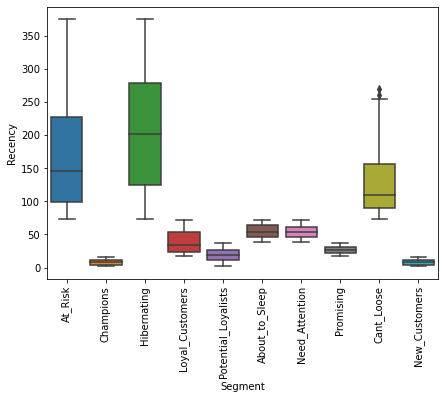

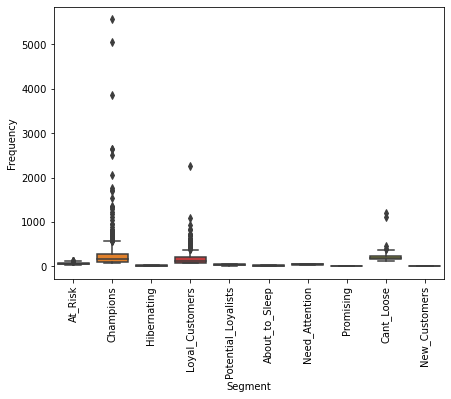

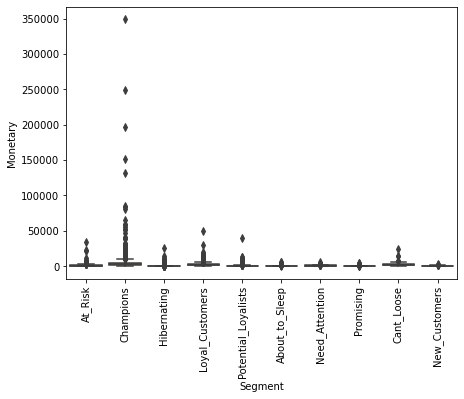

In [310]:
# Let's look at Recency Frequency and Monatary distributions by Segments
cols =["Recency","Frequency","Monetary"]
for i in range(3):
    plt.subplots( figsize=(7, 5))
    sns.boxplot(x="Segment",y= cols[i],data=rfm)
    plt.xticks(rotation=90);
    plt.show()

In [311]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.0,166,33,372.86,2,3,2,232,At_Risk
1,12347.0,4,71,1323.32,5,4,4,544,Champions
2,12348.0,75,20,222.16,2,2,1,221,Hibernating
3,12349.0,44,102,2671.14,3,4,5,345,Loyal_Customers
4,12351.0,12,21,300.93,5,2,2,522,Potential_Loyalists


In [769]:
rfm_segment = rfm.groupby("Segment").agg({"Customer ID":"count", "Recency":"mean", "Frequency":"mean", "Monetary":"mean"})
rfm_segment.columns=['n_Customer', 'Recency', 'Frequency', 'Monetary']

In [775]:
rfm_segment

,n_Customer,Recency,Frequency,Monetary
Segment,,,,
About_to_Sleep,344,54.543605,16.107558,447.839826
At_Risk,577,166.053726,59.564991,1180.625170
Cant_Loose,99,129.868687,220.646465,3002.426980
Champions,632,8.039557,273.354430,6964.077188
Hibernating,1027,207.059396,14.516066,461.186768
Loyal_Customers,773,38.401035,168.276843,2662.046864
Need_Attention,166,54.680723,45.271084,935.626627
New_Customers,66,8.757576,7.818182,482.087121
Potential_Loyalists,516,19.439922,37.203488,1024.276880


### **When we examine the below RFM Chart and the below pointplot chart together, we can observe the Monetary average value in addition to the two-dimensional RFM table.**

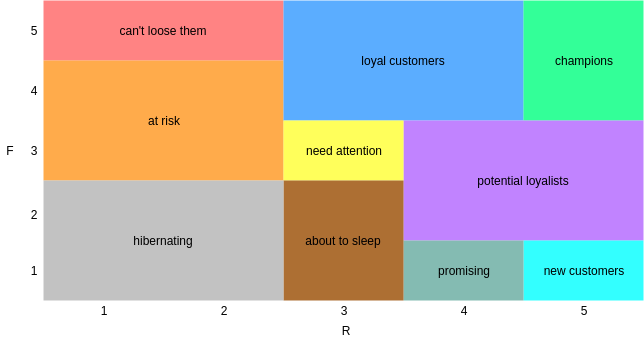

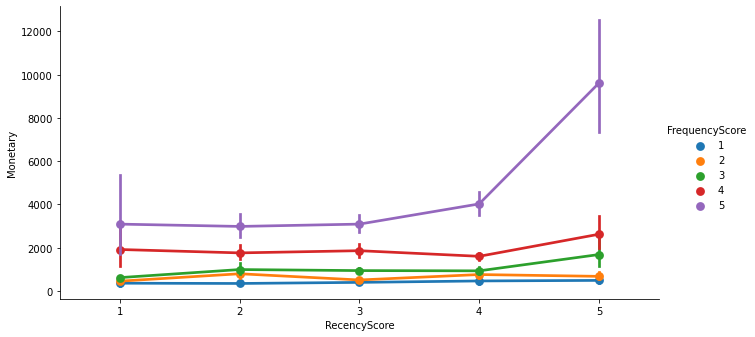

In [626]:
image_path = 'RFM Analizi Tablosu.png'
display.display(Image.open(image_path))

# RMonetary Average by Recdncy and Frequency Scors
# I drew it to show the Monetary average according to the Recency score on the horizontal and Frequency scores on the vertical.
sns.catplot(x="RecencyScore", y="Monetary",data=rfm, kind="point", hue="FrequencyScore",  order=[1,2,3,4,5],height=4.6, aspect=2)
plt.show()

#### **When we looked at the graph above, I saw that there was no sharp difference in the monetary average value according to the Recency and Frequency scores regarding the status of the scores. But at the point where the Recency and Frequency scores are 5.5, the monetary average is extremely high, while in other cases it is close to each other. I think this is due to the contrary high values in monetary values. In order to observe this situation, I wanted to examine the monetary score according to the recency and frequency scores separately. The two graphs in the following outputs show the analysis of the monetary score versus the other scores.**

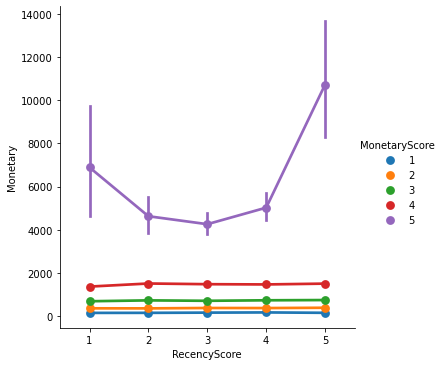

In [409]:
# Exemine Monetary score by Recency score
sns.catplot(x="RecencyScore", y="Monetary",data=rfm, kind="point", hue="MonetaryScore",order=[1,2,3,4,5])

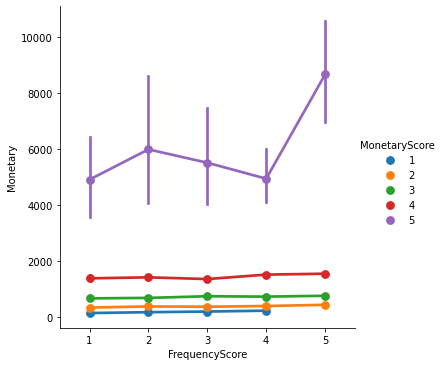

In [408]:
# Exemine Moneyery Score by Frequency score
sns.catplot(x="FrequencyScore", y="Monetary",data=rfm, kind="point", hue="MonetaryScore",order=[1,2,3,4,5])

#### **When we look at the two graphs above, we can see that the Recency score and frequency score have no effect on monetary skoaru 1 2 3 4, but on monetray score 5.**